In [1]:
from torch.utils.data import Dataset
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision
import torchaudio
import os
import torch.nn as nn
from torchsummary import summary




In [2]:
import os
print(os.getcwd())


c:\Users\Acer\OneDrive\Desktop\UrbanSound8k\DXCUP


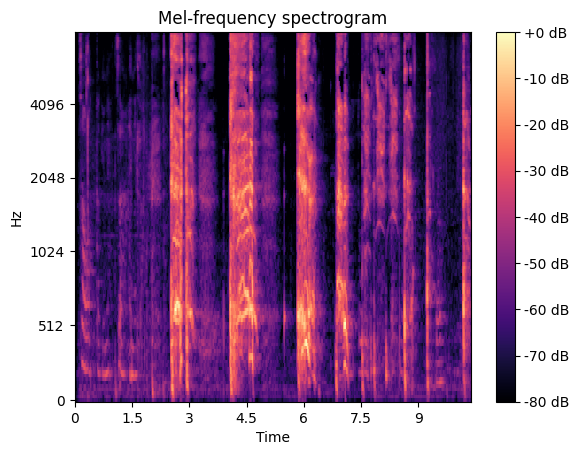

In [2]:
# Correct the file path
file_path = 'C:/Users/Acer/OneDrive/Desktop/UrbanSound8k/DXCUP/Ondorhaan 2.wav'

# Load the audio file
y, sr = librosa.load(file_path)

# Generate Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert the Mel spectrogram to dB
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

# Show the plot
plt.show()

In [3]:
class UrbanSoundDataset(Dataset):
    def __init__(self, annotations_file, audio_dir, transformation, target_sample_rate, num_samples, device):
        self.annotations = pd.read_csv(annotations_file)
        self.audio_dir = audio_dir
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        audio_sample_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        signal, sr = torchaudio.load(audio_sample_path)
        signal = signal.to(self.device)
        
        signal = self._resample_if_necessary(signal, sr)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)
        
        # Apply transformation
        signal = self.transformation(signal)
        return signal, label
    
    # Other helper functions remain the same...


In [5]:
if __name__ == "__main__":
    
    print("Current Working Directory:", os.getcwd())
    
    ANNOTATIONS_FILE = 'C:/Users/Acer/OneDrive/Desktop/UrbanSound8K/DXCUP/Sound.csv'
    AUDIO_DIR = 'C:/Users/Acer/OneDrive/Desktop/UrbanSound8K/DXCUP/Ondorhaan 2.wav'

    # Шаардлагатай үндсэн параметрүүдийг тохируулж өгнө
    SAMPLE_RATE = 22050
    NUM_SAMPLES = 22050
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Mel spectrogram-ыг тохируулна
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_mels=128,
        n_fft=1024,
        hop_length=512
    ).to(device)
    
    # Create the dataset instance
    usd = UrbanSoundDataset(
        annotations_file=ANNOTATIONS_FILE,
        audio_dir=AUDIO_DIR,
        transformation=mel_spectrogram,
        target_sample_rate=SAMPLE_RATE,
        num_samples=NUM_SAMPLES,
        device=device
    )
    
    # Access the first sample
    signal, label = usd[0]
    print(f"Signal shape: {signal.shape}, Label: {label}")


Current Working Directory: c:\Users\Acer\OneDrive\Desktop\UrbanSound8k\DXCUP


AttributeError: 'UrbanSoundDataset' object has no attribute '_get_audio_sample_path'